1. [Read datas](#1)
2. [Poverty rate of each state](#2)
3. [Most common 15 name or surname of killed people](#3)
4. [High school graduation rates of population over 25](#4)
5. [Population percentage of each state according to races](#5)
6. [High school graduation rate vs poverty rate for each state](#6)
7. [Kill properties](#7)
   * [Manner of death](#8)
   * [Kill weapon](#9)
   * [Age of killed people](#8)
   * [Race of killed people](#11)
   * [Most dangerous cities](#12)
   * [Most dangerous states](#13)
   * [Having mental illness or not for killed people](#14)
   * [Threat types](#15)
   * [Flee types](#16)
   * [Police having body cameras or not](#17)
8. [Race rates according to states in kill data](#18)
9. [Kill number from states in kill data](#19)


* [Horizontal Bar Plot](#5)
* [Point Plot](#6)
* [Joint Plot](#20)
* [Pie Plot](#21)
* [LM Plot](#22)
* [KDE Plot](#23)
* [Violin Plot](#24)
* [Heatmap](#25)
* [Box Plot](#8)
* [Swarm Plot](#26)
* [Pair Plot](#27)
* [Count Plot](#28)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv
/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv
/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv
/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv
/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv


<a id='1' ></a>
# Read datas

In [2]:
#read data
median_household_in_come=pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv',encoding='windows-1252')
percentage_people_below_poverty_level=pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv',encoding='windows-1252')
percent_over_25_completed_highSchool=pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv',encoding='windows-1252')
share_race_city=pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv',encoding='windows-1252')
kill=pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv',encoding='windows-1252')

<a id='2' ></a>
# Poverty rate of each state

In [3]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [5]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10       128
        ... 
90.9       1
68.9       1
58.6       1
50.6       1
84.7       1
Name: poverty_rate, Length: 771, dtype: int64

In [6]:
# change '-' with 0.0
# percentage_people_below_poverty_level_1=percentage_people_below_poverty_level.copy()
# percentage_people_below_poverty_level_1[percentage_people_below_poverty_level_1.poverty_rate=='-']='0'

In [7]:
# change '-' with 0.0
percentage_people_below_poverty_level.poverty_rate.replace('-',0.0,inplace=True)
#turn dtype of poverty_rate column into float
percentage_people_below_poverty_level.poverty_rate=percentage_people_below_poverty_level.poverty_rate.astype(float)

In [8]:
#determine the states
area_list=list(percentage_people_below_poverty_level['Geographic Area'].unique())

In [9]:
#area poverty ratio
area_poverty_ratio=[]
for i in area_list:
    area_poverty_ratio.append(percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i].poverty_rate.mean())

In [10]:
#making a dataframe from area_list and area_poverty_ratio
data=pd.DataFrame({"area_list":area_list, "area_poverty_ratio":area_poverty_ratio})
print(data)

   area_list  area_poverty_ratio
0         AL           20.611795
1         AK           18.678592
2         AZ           25.268071
3         AR           22.963216
4         CA           16.888371
5         CO           13.187773
6         CT            9.137500
7         DE           12.555844
8         DC           18.000000
9         FL           17.508606
10        GA           23.663636
11        HI           13.400662
12        ID           18.076211
13        IL           13.849342
14        IN           15.499853
15        IA           12.231548
16        KS           14.719048
17        KY           20.080000
18        LA           22.291772
19        ME           16.893846
20        MD           10.272394
21        MA            9.546341
22        MI           17.900723
23        MN           13.745736
24        MS           26.884254
25        MO           19.930687
26        MT           16.423288
27        NE           12.917414
28        NV           12.370992
29        

In [11]:
new_index=data.area_poverty_ratio.sort_values(ascending=False).index.values
new_index

array([24,  2, 10,  3, 31, 18, 40, 48,  0, 36, 17, 25, 42, 33, 43,  1, 12,
        8, 22,  9, 19,  4, 37, 26, 41, 14, 35, 47, 16, 46, 13, 45, 23, 11,
        5, 27, 49, 29,  7, 38, 28, 15, 34, 44, 32, 39, 20, 21,  6, 50, 30])

In [12]:
sorted_data=data.reindex(new_index)
sorted_data.head()

,area_list,area_poverty_ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675


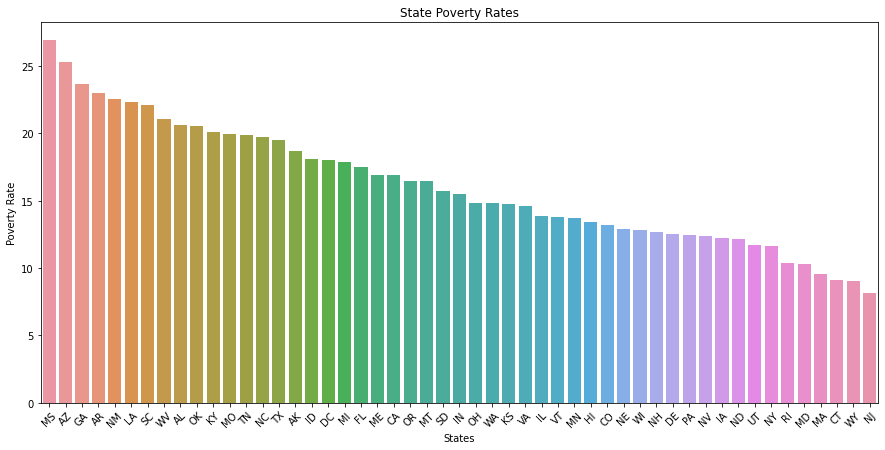

In [13]:
#visualisation
plt.figure(figsize=(15,7))
sns.barplot(sorted_data.area_list,sorted_data.area_poverty_ratio)
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('State Poverty Rates')
plt.show()

<a id='3' ></a>
# Most common 15 name or surname of killed people

### My first method

In [14]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [15]:
kill.name.isnull().any()

False

In [16]:
kill["number_of_names"]=[len(i.split()) for i in kill.name]
kill["number_of_names"].value_counts()

2    1651
3     836
4      48
Name: number_of_names, dtype: int64

In [17]:
"Lewis Lee Lembke".split()

['Lewis', 'Lee', 'Lembke']

In [18]:
Name1=[]
Name2=[]
Surname1=[]
Surname2=[]

for i in kill.name:
    num=len(i.split())
    list1=i.split()
    
    if num==2:
        Name1.append(list1[0])
        Name2.append(np.NaN)
        Surname1.append(list1[1])
        Surname2.append(np.NaN)
    if num==3:
        Name1.append(list1[0])
        Name2.append(list1[1])
        Surname1.append(list1[2])
        Surname2.append(np.NaN)
    if num==4:
        Name1.append(list1[0])
        Name2.append(list1[1])
        Surname1.append(list1[2])
        Surname2.append(list1[3])

kill["Name1"]=Name1
kill["Name2"]=Name2
kill["Surname1"]=Surname1
kill["Surname2"]=Surname2
print(kill.head())

   id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun  53.0   
1   4    Lewis Lee Lembke  02/01/15              shot         gun  47.0   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon  32.0   
4   9   Michael Rodriguez  04/01/15              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  number_of_names    Name1 Name2   Surname1  \
0  Not fleeing    

In [19]:
for i in ["Name1","Name2","Surname1","Surname2"]:
    print(kill[i].value_counts().index[0],kill[i].value_counts()[0])

Michael 75
Lee 33
TK 49
Jr. 10


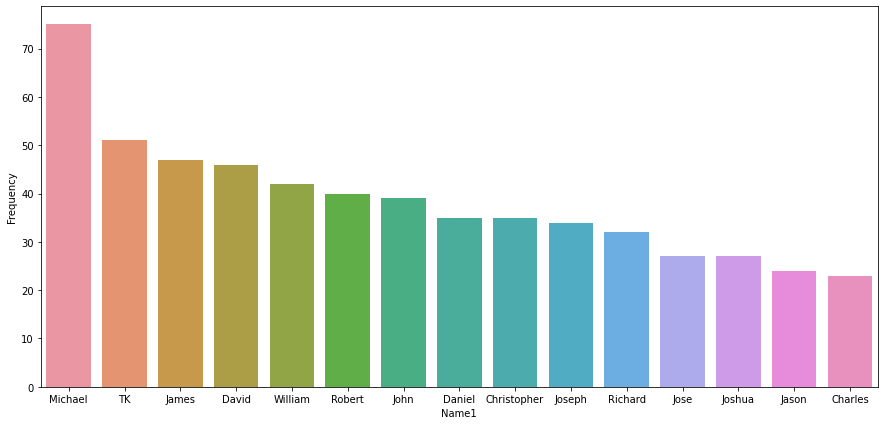

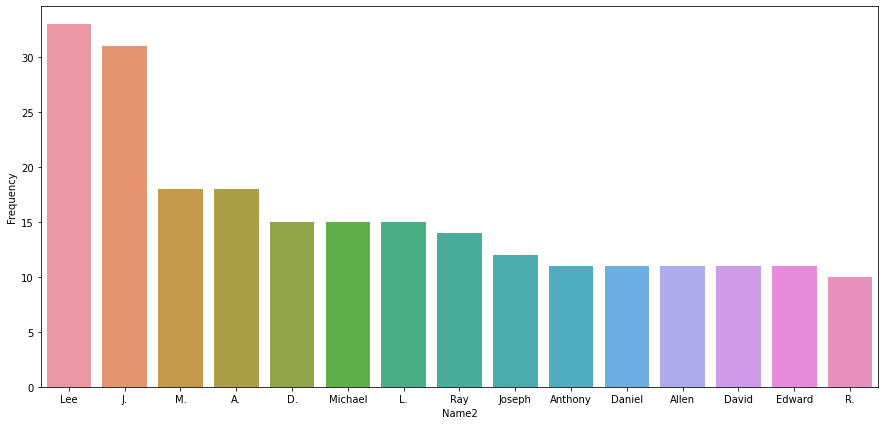

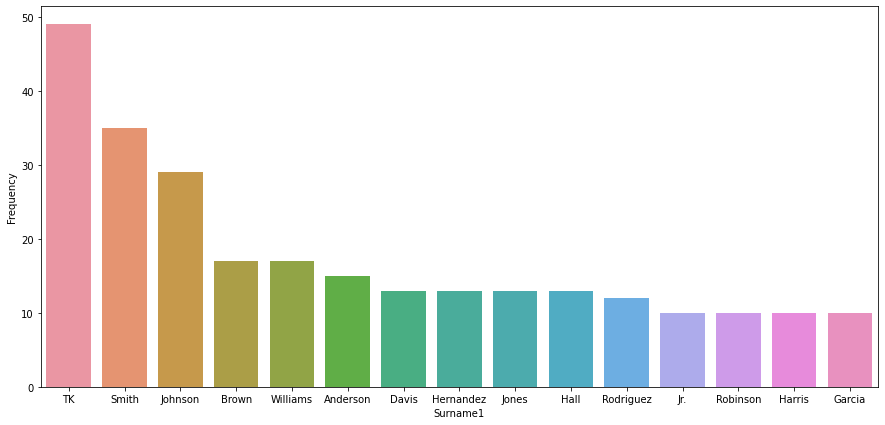

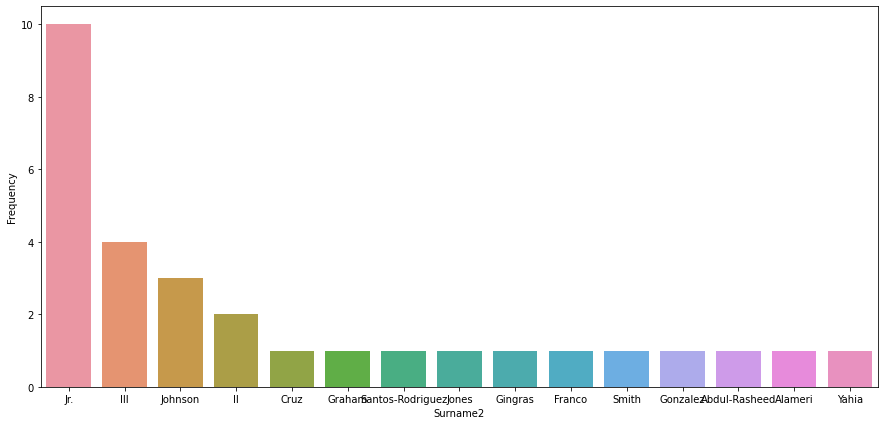

In [20]:
#drawing separate barplots for all names and surnames
for i in ["Name1","Name2","Surname1","Surname2"]:
    plt.figure(figsize=(15,7))
    sns.barplot(x=kill[i].value_counts()[0:15].index, y=kill[i].value_counts()[0:15])
    #plt.xticks(kill[i].value_counts().index)
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()

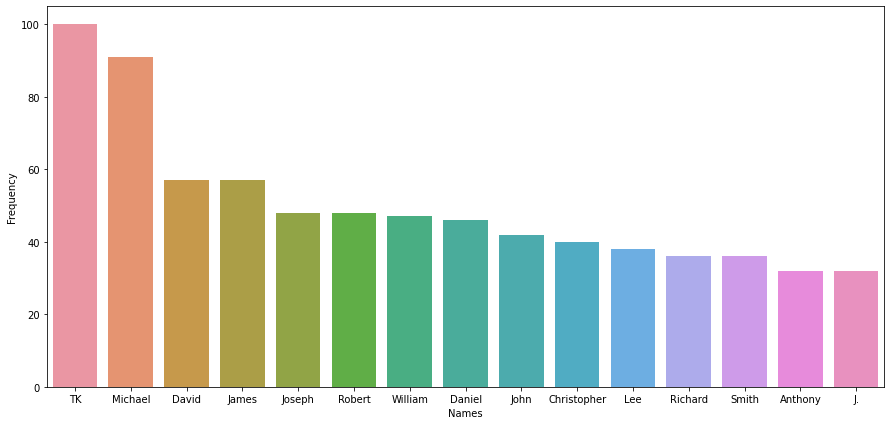

In [21]:
#drawing one barplot after combining all names and surnames
Name_sum=Name1+Name2+Surname1+Surname2
df=pd.DataFrame({"Name_sum": Name_sum})
#df["Name_sum"].value_counts()

plt.figure(figsize=(15,7))
sns.barplot(x=df["Name_sum"].value_counts()[0:15].index, y=df["Name_sum"].value_counts()[0:15])
#plt.xticks(df["Name_sum"].value_counts().index)
plt.xlabel("Names")
plt.ylabel("Frequency")
plt.show()


### My second method

In [22]:
kill.name.value_counts()

TK TK                       49
Michael Brown                2
TK Tk                        2
Brandon Jones                2
Daquan Antonio Westbrook     2
                            ..
Jorge Victor                 1
Clemente Najera              1
Dale Maverick Hudson         1
Donald Lewis Matkins         1
Robert T. Edwards            1
Name: name, Length: 2481, dtype: int64

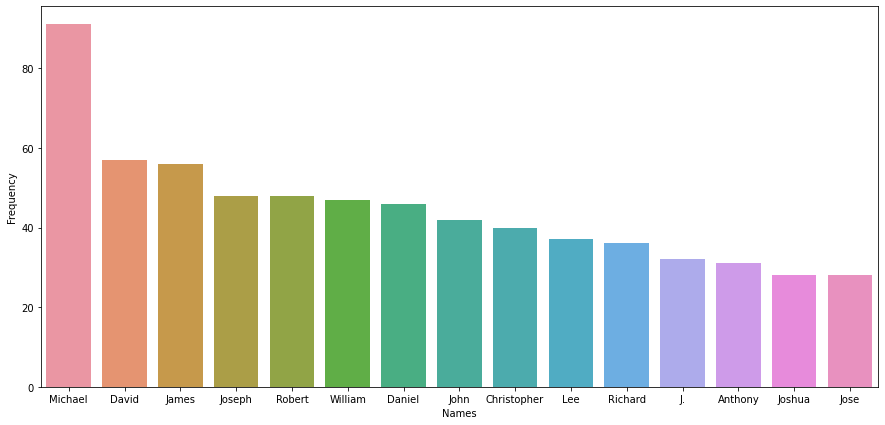

In [23]:
separate=kill.name[kill.name != 'TK TK'].str.split()   #separate is a series that is formed of lists
a,b=zip(*separate)   # len(a)=len(b)=len(separate)  3. ve 4. isimler a veya b'ye giremedi.
ab=list(a+b)

#alternatively
#name_list=[names for i in separate for names in i]  

kill_2=pd.DataFrame({"ab":ab})

#visualize
plt.figure(figsize=(15,7))
sns.barplot(x=kill_2["ab"].value_counts()[0:15].index, y=kill_2["ab"].value_counts()[0:15])
plt.xlabel("Names")
plt.ylabel('Frequency')
plt.show()

### DataiTeam's Method

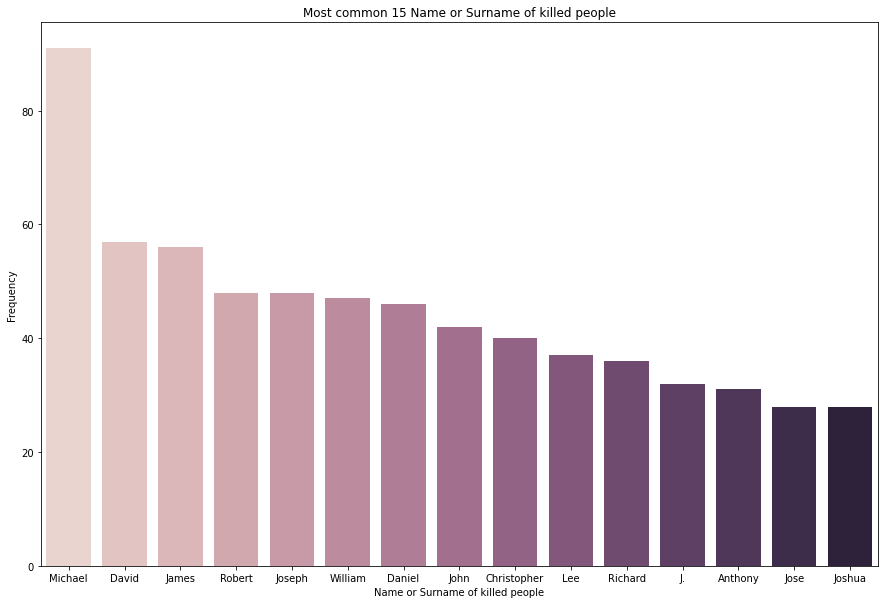

In [24]:
# Most common 15 Name or Surname of killed people
separate = kill.name[kill.name != 'TK TK'].str.split() 
a,b = zip(*separate)                    
name_list = a+b                         
name_count = Counter(name_list)         
most_common_names = name_count.most_common(15)  
x,y = zip(*most_common_names)
x,y = list(x),list(y)

#visualise 
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')
plt.show()

<a id='4' ></a>
# High school graduation rates of population over 25

In [25]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [26]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area         29329 non-null object
City                    29329 non-null object
percent_completed_hs    29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [27]:
percent_over_25_completed_highSchool.percent_completed_hs.value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
24.1       1
17.2       1
20.1       1
34.1       1
22.8       1
Name: percent_completed_hs, Length: 728, dtype: int64

In [28]:
percent_over_25_completed_highSchool.replace('-',0.0,inplace=True)

In [29]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area         29329 non-null object
City                    29329 non-null object
percent_completed_hs    29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [30]:
percent_over_25_completed_highSchool.percent_completed_hs=percent_over_25_completed_highSchool.percent_completed_hs.astype(float)

In [31]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area         29329 non-null object
City                    29329 non-null object
percent_completed_hs    29329 non-null float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [32]:
df=percent_over_25_completed_highSchool[["Geographic Area","percent_completed_hs"]].groupby("Geographic Area").mean()

In [33]:
df_sorted=df["percent_completed_hs"].sort_values(ascending=True)

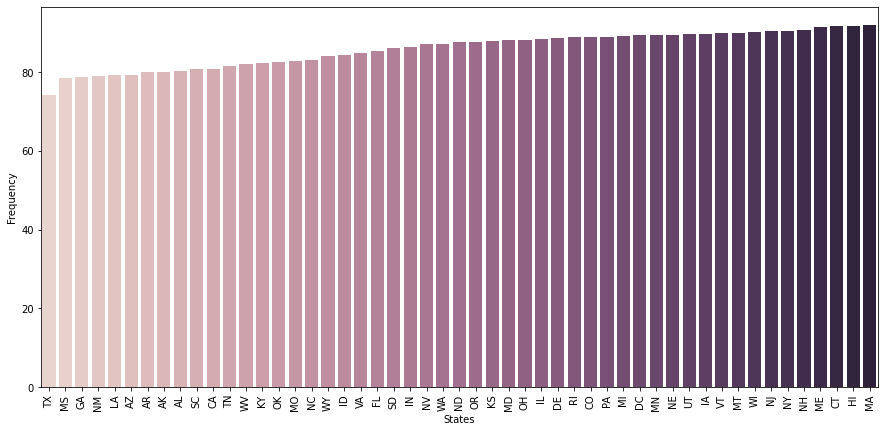

In [34]:
plt.figure(figsize=(15,7))
sns.barplot(x=df_sorted.index, y=df_sorted, palette=sns.cubehelix_palette(len(df_sorted)))
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Frequency')
plt.show()

## High School Graduation Rates, DataiTeam's Method


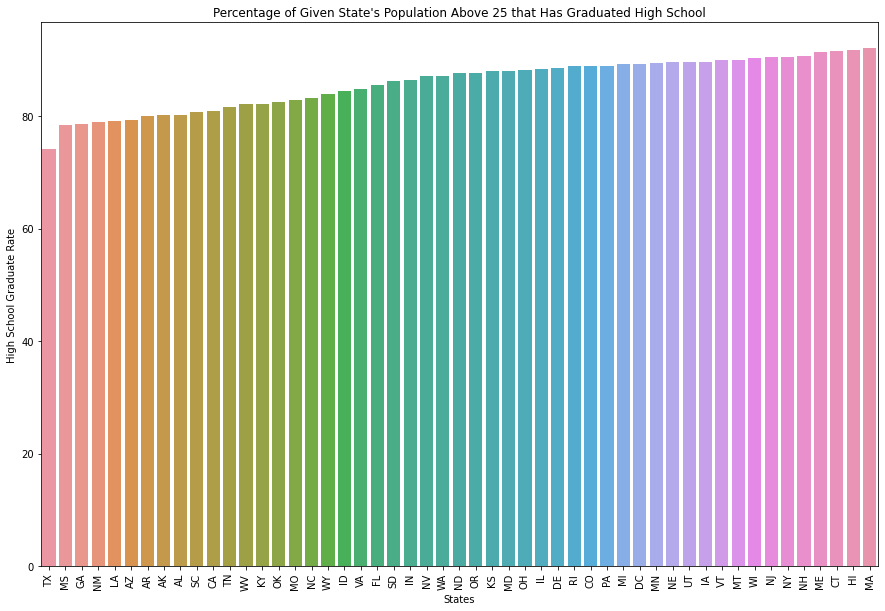

In [35]:
# High school graduation rate of the population that is older than 25 in states
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)

# sorting
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")
plt.show()

<a id='5' ></a>
# Population percentage of each state according to races

### DataiTeam's Method

In [36]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [37]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


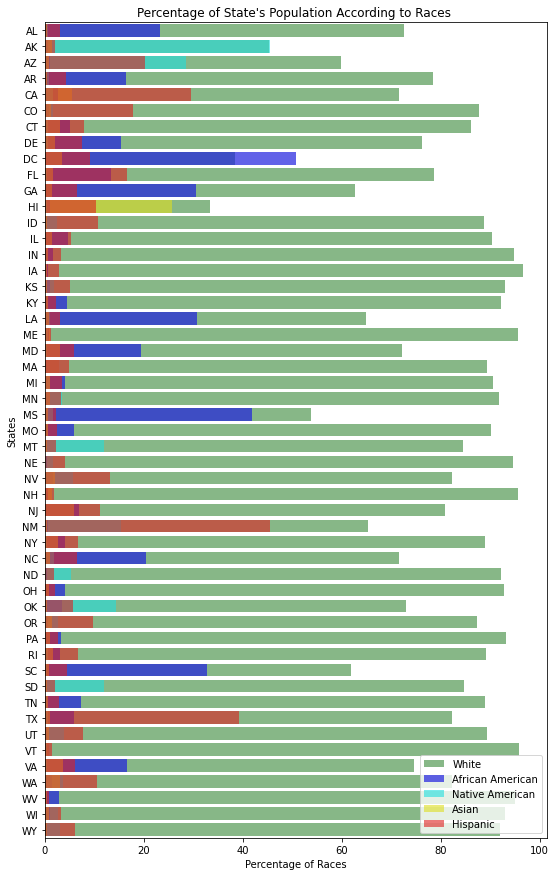

In [38]:
# Percentage of state's population according to races that are black,white,native american, asian and hispanic
share_race_city.replace(['-'],0.0,inplace = True)
share_race_city.replace(['(X)'],0.0,inplace = True)
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))

# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")
plt.show()

### My method

In [39]:
share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

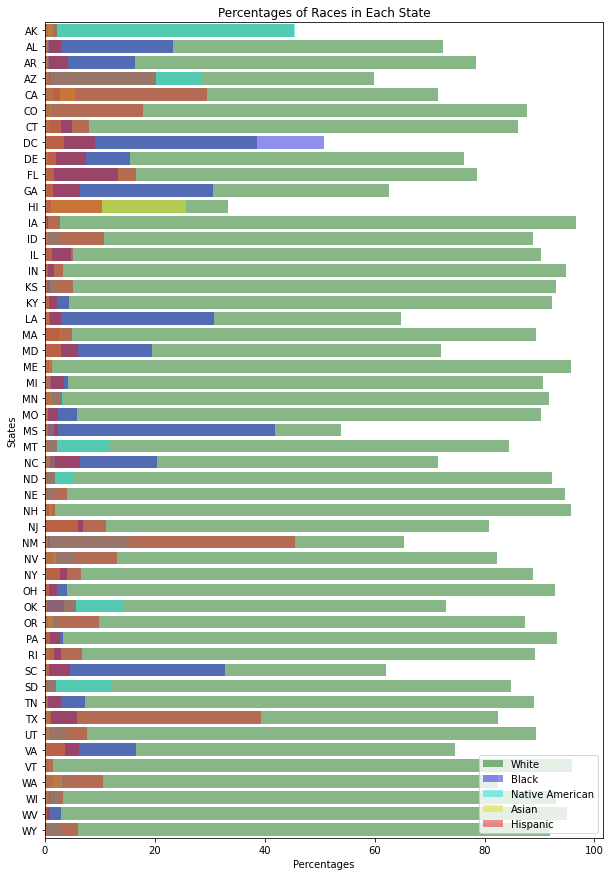

In [40]:
share_race_city.replace('-',0.0,inplace=True)
share_race_city.replace('(X)',0.0,inplace=True)
share_race_city[['share_white', 'share_black','share_native_american', 'share_asian', 'share_hispanic']]=share_race_city[['share_white', 'share_black','share_native_american', 'share_asian', 'share_hispanic']].astype(float)
df=share_race_city[['Geographic area','share_white', 'share_black','share_native_american', 'share_asian', 'share_hispanic']].groupby('Geographic area').mean()

#visualise
f,ax=plt.subplots(figsize=(10,15))
sns.barplot(x=df.share_white, y=df.index, color='green', alpha=0.5, label='White')
sns.barplot(x=df.share_black, y=df.index, color='blue', alpha=0.5, label='Black')
sns.barplot(x=df.share_native_american, y=df.index, color='cyan', alpha=0.5, label='Native American')
sns.barplot(x=df.share_asian, y=df.index, color='yellow', alpha=0.5, label='Asian')
sns.barplot(x=df.share_hispanic, y=df.index, color='red', alpha=0.5, label='Hispanic')

plt.legend(loc='lower right')
plt.xlabel('Percentages')
plt.ylabel('States')
plt.title('Percentages of Races in Each State')

#alternatively
ax.legend(loc='lower right')
ax.set(xlabel='Percentages',ylabel='States',title='Percentages of Races in Each State')

plt.show()

<a id='6' ></a>
# High school graduation rate vs poverty rate for each state

In [41]:
sorted_data["area_poverty_ratio"]=sorted_data["area_poverty_ratio"]/max(sorted_data["area_poverty_ratio"])
sorted_data2["area_highschool_ratio"]=sorted_data2["area_highschool_ratio"]/max(sorted_data2["area_highschool_ratio"])
concat_data=pd.concat([sorted_data, sorted_data2["area_highschool_ratio"]], axis=1)

In [42]:
concat_data.sort_values("area_poverty_ratio", inplace=True)
concat_data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


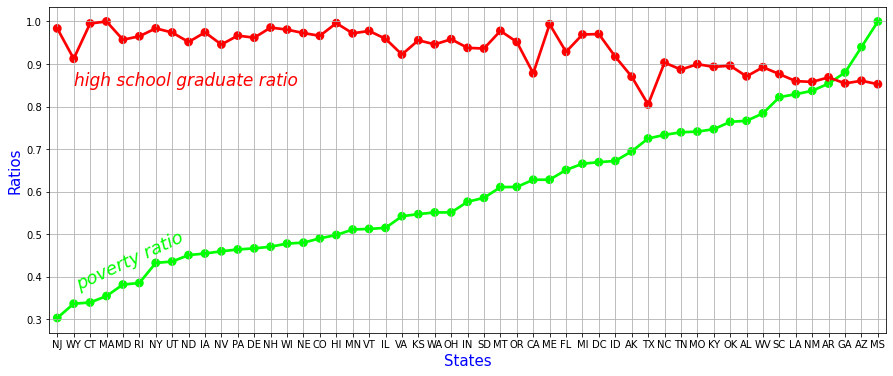

In [43]:
f,ax1=plt.subplots(figsize=(15,6))
sns.pointplot(x="area_list", y='area_poverty_ratio', data=concat_data, color='lime', alpha=0.8)
sns.pointplot(x="area_list", y='area_highschool_ratio', data=concat_data, color='r', alpha=0.8)
plt.text(1,0.85,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.text(1,0.37,"poverty ratio",color='lime',fontsize=18,style='italic',rotation=25)
plt.xlabel('States',fontsize=15,color='b')
plt.ylabel('Ratios',fontsize=15,color='b')
plt.grid()
plt.show()

<a id='20' ></a>
# Joint Plot

In [44]:
concat_data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


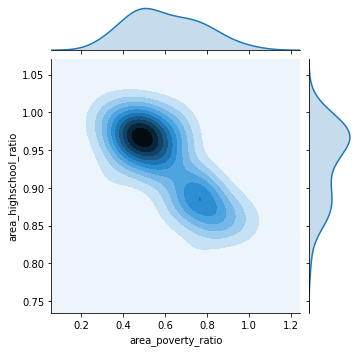

In [45]:
#the joint distribution using kernel density estimation 
g=sns.jointplot("area_poverty_ratio", "area_highschool_ratio", data=concat_data, kind='kde', height=5)
plt.savefig('graph.png')
plt.show()

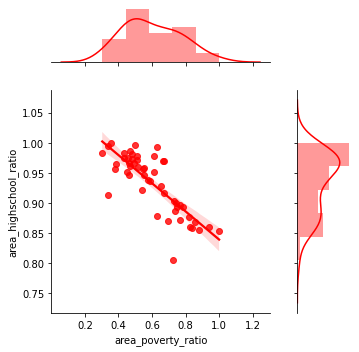

In [46]:
# you can change parameters of joint plot
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
# Different usage of parameters but same plot with previous one
sns.jointplot("area_poverty_ratio", "area_highschool_ratio", data=concat_data, kind='reg', height=5, color='r', ratio=3, space=0.5)
plt.show()

<a id='21' ></a>
# Pie Plot

In [47]:
#Race rates according to kill data
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

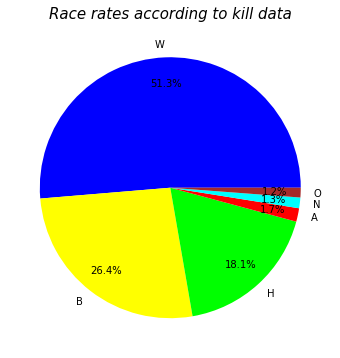

In [48]:
kill.race.dropna(inplace=True)
labels=kill.race.value_counts().index
sizes=kill.race.value_counts().values
colors=["blue","yellow","lime","red","cyan","brown"]
explode=[0,0,0,0,0,0]

#visualise
plt.figure(figsize=(6,6))
plt.pie(sizes, colors=colors, labels=labels, explode=explode, autopct='%1.1f%%', pctdistance=0.8)
plt.title('Race rates according to kill data',fontsize=15,style='italic')
plt.show()

<a id='22' ></a>
# LM Plot

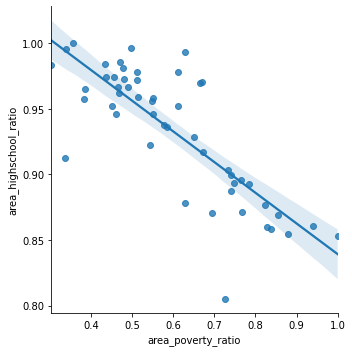

In [49]:
concat_data.head()
sns.lmplot(x="area_poverty_ratio", y="area_highschool_ratio", data=concat_data)
plt.show()

<a id='23' ></a>
# KDE Plot

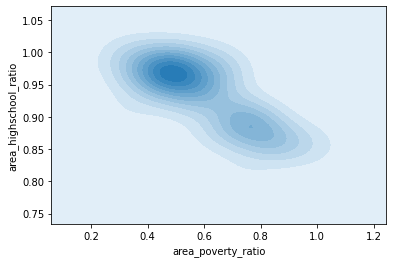

In [50]:
sns.kdeplot(data=concat_data.area_poverty_ratio, data2=concat_data.area_highschool_ratio, cut=3, shade=True)
plt.show()

<a id='24' ></a>
# Violin Plot

In [51]:
concat_data

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107
39,RI,0.385707,0.965191
32,NY,0.432929,0.983804
44,UT,0.436115,0.974097
34,ND,0.451265,0.951839
15,IA,0.454971,0.974321


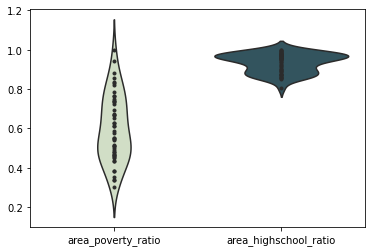

In [52]:
pal=sns.cubehelix_palette(n_colors=2, rot=-0.5, dark=0.3)
sns.violinplot(data=concat_data, palette=pal, inner='points')
plt.show()

<a id='25' ></a>
# Heatmap

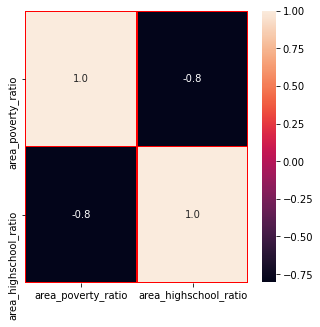

In [53]:
plt.figure(figsize=(5,5))
sns.heatmap(concat_data.corr(), linewidths=.8, linecolor='red', annot=True, fmt='.1f')
plt.show()

<a id='8' ></a>
# Box Plot

In [54]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

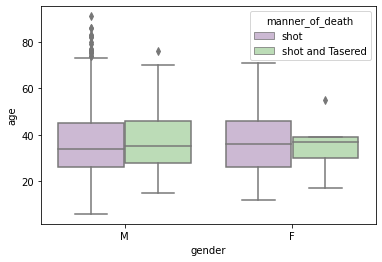

In [55]:
#manner of death
#age
#gender

sns.boxplot(x="gender", y="age", data=kill, hue="manner_of_death", palette='PRGn')
plt.show()

<a id='26' ></a>
# Swarm Plot
Should not be used with high numbers of data since it consumes lots of memory.

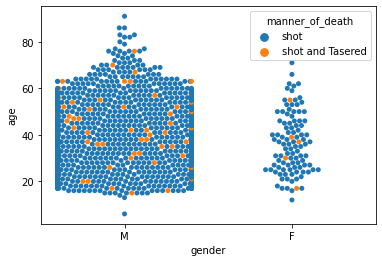

In [56]:
#manner of death
#age
#gender

sns.swarmplot(x="gender", y="age", data=kill, hue="manner_of_death")
plt.show()

<a id='27' ></a>
# Pair Plot

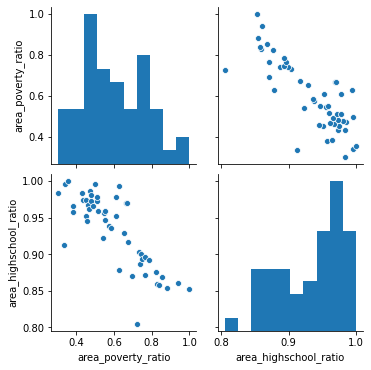

In [57]:
sns.pairplot(concat_data)
plt.show()

<a id='28' ></a>
# Count Plot

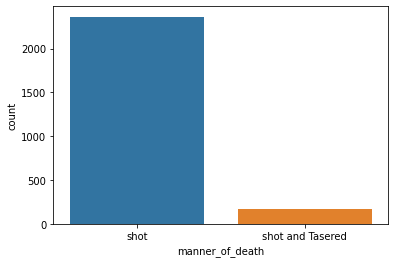

In [58]:
sns.countplot(data=kill, x="manner_of_death")
plt.show()

# Extra Examples

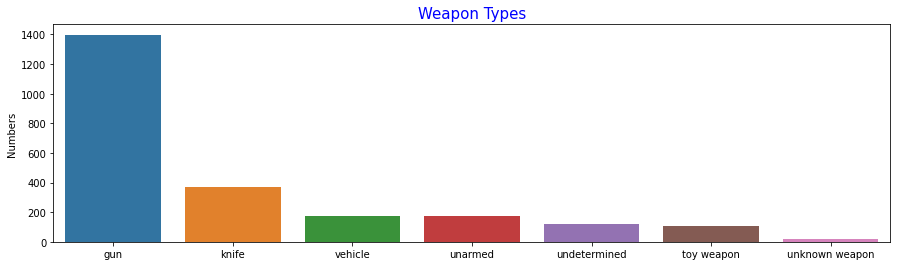

In [59]:
#barplot, weapon types
plt.figure(figsize=(15,4))
sns.barplot(x=kill.armed.value_counts()[:7].index, y=kill.armed.value_counts()[:7])
plt.ylabel('Numbers')
plt.title('Weapon Types', color='b', fontsize=15)
plt.show()

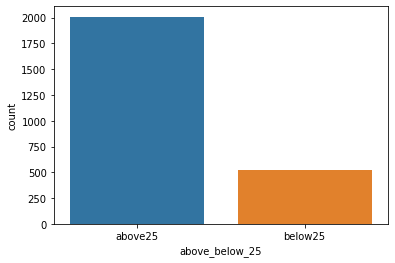

In [60]:
#count, age, above or below 25
above_below_25=['above25' if i>=25 else 'below25' for i in kill.age]
kill["above_below_25"]=above_below_25
sns.countplot(data=kill, x="above_below_25")
plt.show()

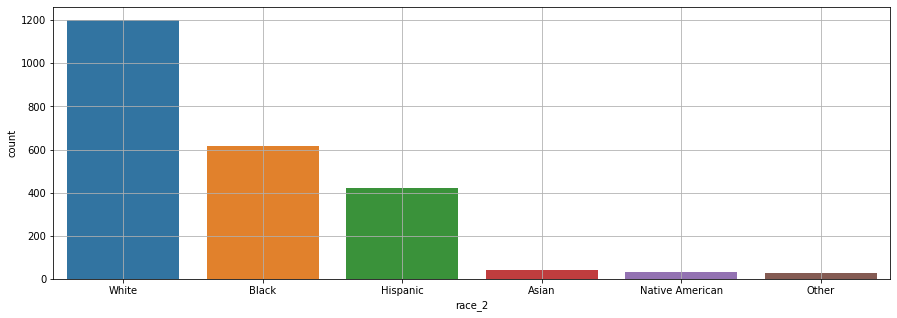

In [61]:
#count, race of killed people
plt.figure(figsize=(15,5))
race_2=[]
for i in kill.race:
    if i=='W':
        race_2.append('White')
    elif i=='B':
        race_2.append('Black')
    elif i=='N':
        race_2.append('Native American')
    elif i=='A':
        race_2.append('Asian')
    elif i=='H':
        race_2.append('Hispanic')
    elif i=='O':
        race_2.append('Other')
    else:
        race_2.append(np.NaN)
        
kill["race_2"]=race_2        
sns.countplot(data=kill, x=kill.race_2, order=kill.race_2.value_counts().index)
plt.grid()
plt.show()

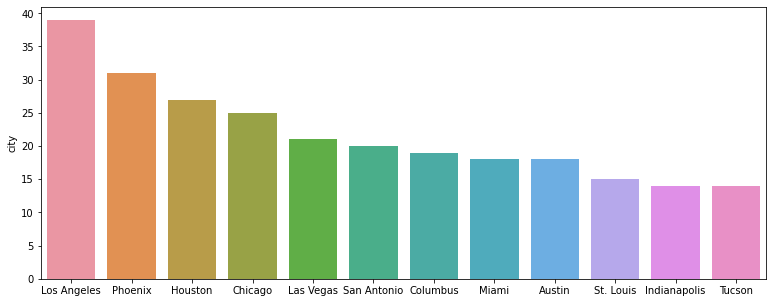

In [62]:
#most dangerous cities
kill.city.value_counts()[:12]
plt.figure(figsize=(13,5))
sns.barplot(x=kill.city.value_counts()[:12].index, y=kill.city.value_counts()[:12])
plt.show()

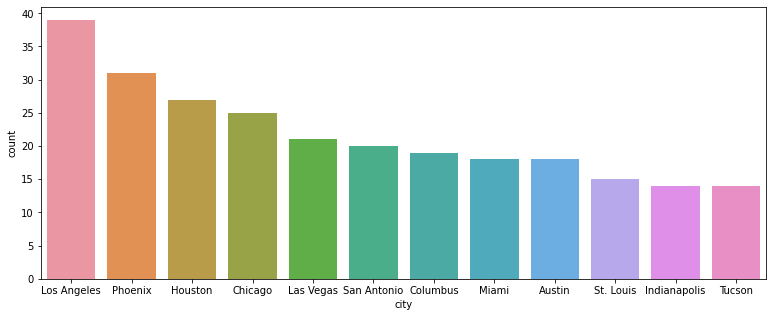

In [63]:
#most dangerous cities
plt.figure(figsize=(13,5))
sns.countplot(x=kill.city, order=kill.city.value_counts()[:12].index)
plt.show()

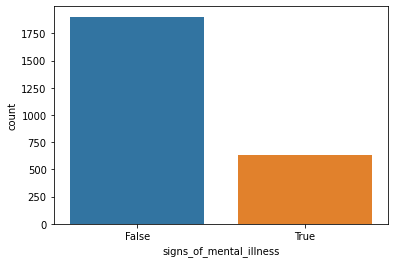

In [64]:
#having mental illness or not
sns.countplot(data=kill, x="signs_of_mental_illness")
plt.show()

In [65]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42.0


In [66]:
data = percentage_people_below_poverty_level.pivot_table(index= ["Geographic Area"], values = "poverty_rate", aggfunc="mean")
data.reset_index(inplace = True)
data.head()

,Geographic Area,poverty_rate
0,AK,18.678592
1,AL,20.611795
2,AR,22.963216
3,AZ,25.268071
4,CA,16.888371


In [67]:
dict1={"treatment":["A","A","B","B"],"gender":["F","M","F","M"],"response":[10,45,5,9],"age":[15,4,72,65]}
df=pd.DataFrame(dict1)
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [68]:
df.pivot_table(index='treatment', values='response', aggfunc="mean")

,response
treatment,
A,27.5
B,7.0


In [69]:
df.groupby("treatment").mean().index

Index(['A', 'B'], dtype='object', name='treatment')